Autocorrelation function?

np.corrcoef, partial
[ 1.          0.67150812  0.50652213  0.39661425  0.43230311  0.19812944
  0.18279458  0.16080418  0.33292761  0.04309733 -0.07276795 -0.20653858
 -0.02317279 -0.15757623 -0.36226819]
manual, non-partial
[ 1.          0.66161357  0.48648425  0.37131335  0.38592761  0.1612626
  0.12708962  0.08055351  0.13459951 -0.03025954 -0.11047549 -0.19393468
 -0.12548812 -0.19842756 -0.29684171]
fft, pad 0s, non-partial
[ 1.          0.66161357  0.48648425  0.37131335  0.38592761  0.1612626
  0.12708962  0.08055351  0.13459951 -0.03025954 -0.11047549 -0.19393468
 -0.12548812 -0.19842756 -0.29684171]
fft, no padding, non-partial
[ 1.          0.67088011  0.47495495  0.3366043   0.30738739  0.05904366
  0.02080388 -0.04278586 -0.01013167 -0.13430353 -0.18586279 -0.26577963
 -0.25374913 -0.37190575 -0.51756064]
np.correlate, non-partial
[ 1.          0.66161357  0.48648425  0.37131335  0.38592761  0.1612626
  0.12708962  0.08055351  0.13459951 -0.03025954 -0.11047549 -0.19393468


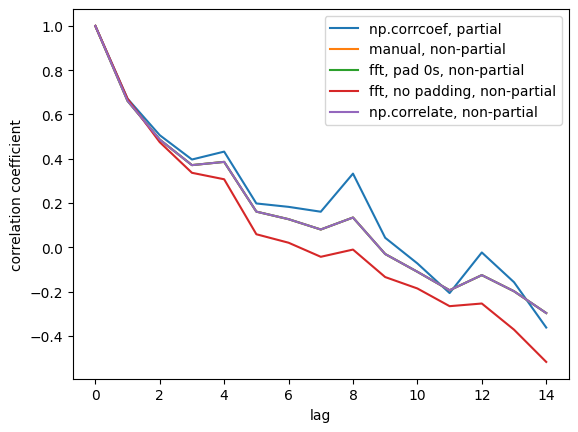

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\drpro\OneDrive\Documents\Python\.conda\Lib\asyncio\events.py", line 84, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\drpro\OneDrive\Documents\Python\.conda\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\drpro\OneDrive\Documents\Python\.conda\Lib\asyncio\events.py", line 84, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\drpro\OneDrive\Documents\Python\.conda\Lib\asyncio\selector_events.py", line 119, in _read_f

In [ ]:
import numpy
import matplotlib.pyplot as plt

def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''

    corr=[1. if l==0 else numpy.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return numpy.array(corr)

def autocorr2(x,lags):
    '''manualy compute, non partial'''

    mean=numpy.mean(x)
    var=numpy.var(x)
    xp=x-mean
    corr=[1. if l==0 else numpy.sum(xp[l:]*xp[:-l])/len(x)/var for l in lags]

    return numpy.array(corr)

def autocorr3(x,lags):
    '''fft, pad 0s, non partial'''

    n=len(x)
    # pad 0s to 2n-1
    ext_size=2*n-1
    # nearest power of 2
    fsize=2**numpy.ceil(numpy.log2(ext_size)).astype('int')

    xp=x-numpy.mean(x)
    var=numpy.var(x)

    # do fft and ifft
    cf=numpy.fft.fft(xp,fsize)
    sf=cf.conjugate()*cf
    corr=numpy.fft.ifft(sf).real
    corr=corr/var/n

    return corr[:len(lags)]

def autocorr4(x,lags):
    '''fft, don't pad 0s, non partial'''
    mean=x.mean()
    var=numpy.var(x)
    xp=x-mean

    cf=numpy.fft.fft(xp)
    sf=cf.conjugate()*cf
    corr=numpy.fft.ifft(sf).real/var/len(x)

    return corr[:len(lags)]

def autocorr5(x,lags):
    '''numpy.correlate, non partial'''
    mean=x.mean()
    var=numpy.var(x)
    xp=x-mean
    corr=numpy.correlate(xp,xp,'full')[len(x)-1:]/var/len(x)

    return corr[:len(lags)]


if __name__=='__main__':

    y=[28,28,26,19,16,24,26,24,24,29,29,27,31,26,38,23,13,14,28,19,19,\
            17,22,2,4,5,7,8,14,14,23]
    y=numpy.array(y).astype('float')

    lags=range(15)
    fig,ax=plt.subplots()

    for funcii, labelii in zip([autocorr1, autocorr2, autocorr3, autocorr4,
        autocorr5], ['np.corrcoef, partial', 'manual, non-partial',
            'fft, pad 0s, non-partial', 'fft, no padding, non-partial',
            'np.correlate, non-partial']):

        cii=funcii(y,lags)
        print(labelii)
        print(cii)
        ax.plot(lags,cii,label=labelii)

    ax.set_xlabel('lag')
    ax.set_ylabel('correlation coefficient')
    ax.legend()
    plt.show()